In [1]:
import numpy as np
from src.utils.utils import *
from src.utils import plot_config
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 100

/opt/anaconda3/envs/dpmol/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


---
# $1 \mu s$
---

In [3]:
data_engs = np.load("data/condMADE-datasets/100-1mus/1cond-var/train_1mus-engs.npy")[:, 0]
print(f"mean dataset: {data_engs.mean()}")
print(f"min dataset: {data_engs.min()}")
print(f"max dataset: {data_engs.max()}")

(data_engs.mean() - data_engs.min()) / (data_engs.max() - data_engs.min())

mean dataset: -1.1191339690673223
min dataset: -1.2210371482010003
max dataset: -0.8619975714709999


0.2838215777262618

In [4]:
neigh, coup, len_neigh = get_couplings(10, "data/couplings/100.txt")
samples12 = np.load("data/made-samples/100spins/1cond-var/sample-100000_size-101_1us-emean-1.12.npz")
samples12 = samples12["sample"]

samples15 = np.load("data/made-samples/100spins/1cond-var/sample-100000_size-101_1us-emean-1.5.npz")
samples15 = samples15["sample"]

samples1 = np.load("data/made-samples/100spins/1cond-var/sample-100000_size-101_1us-emean-1.0.npz")
samples1 = samples1["sample"]

samplesGS = np.load("data/made-samples/100spins/1cond-var/sample-100000_size-101_1us-emean-GS.npz")
samplesGS = samplesGS["sample"]

engs12 = []
for sample in samples12:
    engs12.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

engs15 = []
for sample in samples15:
    engs15.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

engs1 = []
for sample in samples1:
    engs1.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

engsGS = []
for sample in samplesGS:
    engsGS.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    


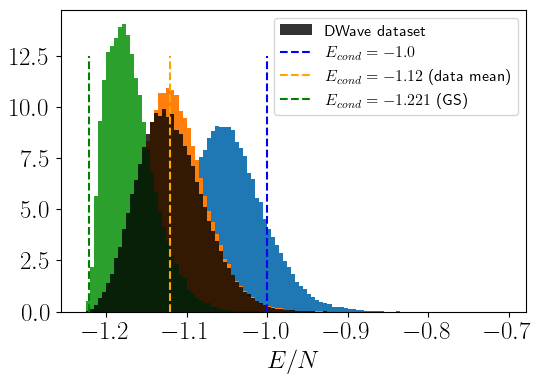

In [5]:

bins = np.arange(-1.23, -0.7, 0.005)
plt.hist(engs1, bins=bins, alpha=1, density=True)
plt.hist(engs12, bins=bins, alpha=1, density=True)
plt.hist(engsGS, bins=bins, alpha=1, density=True)
# plt.hist(engs15, bins=bins, alpha=1, density=True)
plt.hist(data_engs, bins=bins, label="DWave dataset", density=True, color="k", alpha=0.8)
plt.rcParams["figure.facecolor"] = "w"
plt.vlines(-1, 0, 12.5, linestyle="dashed", color="blue", label=r"$E_{cond}=-1.0$")
plt.vlines(-1.12, 0, 12.5, linestyle="--", color="orange", label=r"$E_{cond}=-1.12$ (data mean)")
plt.vlines(-1.221, 0, 12.5, linestyle="--", color="green", label=r"$E_{cond}=-1.221$ (GS)")
plt.xlabel(r"$E/N$")
# plt.yscale("log")
plt.legend(fontsize=11.5)
plt.show()

---
# New MADE
---

In [8]:
samples112 = np.load("data/made-samples/100spins/100cond-var/sample-100000_size-200-Econd-1.12_2023-11-10_100-dwave-newMADE.npz")

samples112 = samples112["sample"]
engs112 = []
for sample in samples112:
    engs112.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
samples1221 = np.load("data/made-samples/100spins/100cond-var/sample-100000_size-200-Econd-1.221_2023-11-10_100-dwave-newMADE.npz")

samples1221 = samples1221["sample"]
engs1221 = []
for sample in samples1221:
    engs1221.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
samples1 = np.load("data/made-samples/100spins/100cond-var/sample-100000_size-200-Econd-1.0_2023-11-10_100-dwave-newMADE.npz")
samples1 = samples1["sample"]
engs1 = []
for sample in samples1:
    engs1.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))

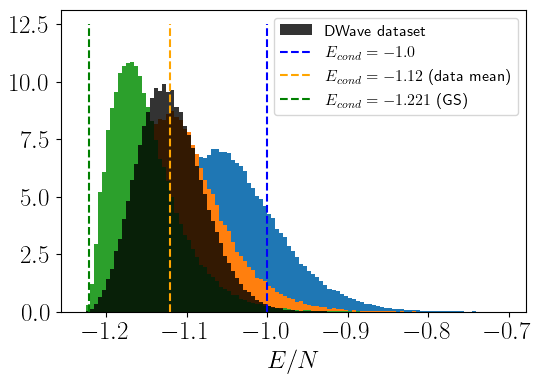

mean DWave: -1.1191339690673223
mean samples: -1.100691833428962


In [9]:
plt.hist(engs1, bins=bins, alpha=1, density=True)
plt.hist(engs112, bins=bins, alpha=1, density=True)
plt.hist(engs1221, bins=bins, alpha=1, density=True)
plt.hist(data_engs, bins=bins, label="DWave dataset", density=True, color="k", alpha=0.8)
plt.vlines(-1, 0, 12.5, linestyle="dashed", color="blue", label=r"$E_{cond}=-1.0$")
plt.vlines(-1.12, 0, 12.5, linestyle="--", color="orange", label=r"$E_{cond}=-1.12$ (data mean)")
plt.vlines(-1.221, 0, 12.5, linestyle="--", color="green", label=r"$E_{cond}=-1.221$ (GS)")
plt.xlabel(r"$E/N$")
plt.legend(fontsize=11.5)
plt.show()
print(f"mean DWave: {np.mean(data_engs)}")
print(f"mean samples: {np.mean(engs112)}")

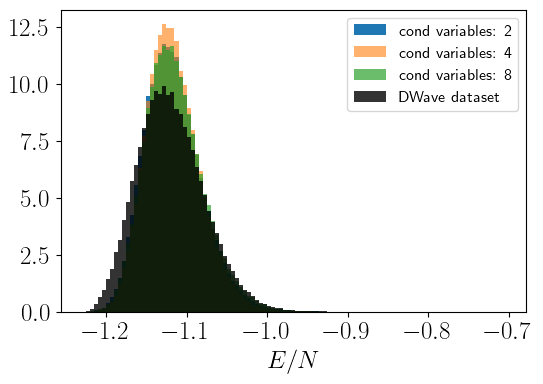

In [10]:
sample_2mean = np.load("data/made-samples/100spins/2cond-var/sample-100000_size-102-Econd0.2838_2023-11-14_12-12-50.npz")
sample_2mean = sample_2mean["sample"]
engs2mean = []
for sample in sample_2mean:
    engs2mean.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
sample_4mean = np.load("data/made-samples/100spins/4cond-var/sample-100000_size-104-Econd0.2838_2023-11-14_12-14-20.npz")
sample_4mean = sample_4mean["sample"]
engs4mean = []
for sample in sample_4mean:
    engs4mean.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
sample_8mean = np.load("data/made-samples/100spins/8cond-var/sample-100000_size-108-Econd0.2838_2023-11-14_12-15-08.npz")
sample_8mean = sample_8mean["sample"]
engs8mean = []
for sample in sample_8mean:
    engs8mean.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/len(sample.flatten()))
    
plt.hist(engs2mean, bins=bins, alpha=1, density=True, label="cond variables: 2")
plt.hist(engs4mean, bins=bins, alpha=0.6, density=True, label="cond variables: 4")
plt.hist(engs8mean, bins=bins, alpha=0.7, density=True, label="cond variables: 8")
plt.hist(data_engs, bins=bins, label="DWave dataset", density=True, color="k", alpha=0.8)
plt.xlabel(r"$E/N$")
plt.legend(fontsize=11.5)
plt.show()

In [12]:
print(np.mean(engs2mean))
print(np.mean(engs4mean))
print(np.mean(engs8mean))

-1.1165721442709597
-1.1165222257005007
-1.114589749521819
